In [26]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
from keras.layers import Input, Dense
from keras.models import Model#----------------------------------------------IMporting required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense
from keras.optimizers import Adam
import random
import keras
import keras.utils
from keras.utils.np_utils import to_categorical 
from keras import utils as np_utils
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import accuracy_score
import time
import math
%matplotlib inline

In [27]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [28]:
import load_data#--------------------------------------------Laading training and testing data

# return DataSet class
data = load_data.read_data_sets(one_hot=True)

# get train data and labels by batch size
train_x, train_label = data.train.next_batch(58128 )

# get test data
test_x = data.test.data

# get test labels
test_labels = data.test.labels

# get sample number
n_samples = data.train.num_examples

In [29]:
#train_x = preprocessing.normalize(train_x)#------------------------------------normalizing data
#test_x = preprocessing.normalize(test_x)

print(train_x.shape)
print(test_x.shape)
print(train_label.shape)
print(test_labels.shape)
test_x = preprocessing.normalize(test_x)
print(test_x[1:])

train_x = preprocessing.normalize(train_x)
print(train_x[1:])


(58128, 310)
(58128, 310)
(58128, 3)
(58128, 3)
[[0.07317903 0.07173882 0.07140528 ... 0.04444753 0.04601037 0.04567384]
 [0.07316392 0.07171469 0.07138108 ... 0.04445415 0.04600904 0.04566965]
 [0.07314408 0.07168242 0.07134856 ... 0.04446116 0.04600954 0.04566672]
 ...
 [0.07799868 0.07658864 0.07651837 ... 0.04795224 0.04781062 0.05202872]
 [0.07800001 0.07658923 0.07651755 ... 0.04795351 0.04781252 0.05203095]
 [0.07799755 0.07658849 0.0765156  ... 0.04795467 0.04781411 0.05203295]]
[[0.0735907  0.07359126 0.07335257 ... 0.04428417 0.04786957 0.04786357]
 [0.0736081  0.073607   0.07336444 ... 0.04428295 0.04787021 0.04786413]
 [0.07362537 0.07362303 0.07337587 ... 0.04428195 0.04787523 0.04786917]
 ...
 [0.07524024 0.07488703 0.07599606 ... 0.04677524 0.04885304 0.04799756]
 [0.07526916 0.07490687 0.07601648 ... 0.04676788 0.04883877 0.04798697]
 [0.07528683 0.07491615 0.07602671 ... 0.04676073 0.04882532 0.04797673]]


In [30]:
input_img= Input(shape=(310,))#--------------------------------creating shape of autoencoder

In [35]:
encoded = Dense(units=128, activation='relu')(input_img)#------------------Adding layers in autoencoder
#encoded = Dense(units=64, activation='relu')(encoded)
#encoded = Dense(units=32, activation='relu')(encoded)
decoded = Dense(units=64, activation='relu')(encoded)
decoded = Dense(units=128, activation='relu')(decoded)
decoded = Dense(units=310, activation='sigmoid')(decoded)

In [36]:
autoencoder=Model(input_img, decoded)

autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 310)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               39808     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_20 (Dense)             (None, 310)               39990     
Total params: 96,374
Trainable params: 96,374
Non-trainable params: 0
_________________________________________________________________


In [37]:
#model.add(autoencoder.layers[1:4])
#encoded_input = model.predict(train_x)
#encoded_input.shape

autoencoder.layers

In [38]:
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 310)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               39808     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_20 (Dense)             (None, 310)               39990     
Total params: 96,374
Trainable params: 96,374
Non-trainable params: 0
_________________________________________________________________


In [39]:
encoder = Model(input_img, encoded)

In [40]:
encoder.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 310)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               39808     
Total params: 39,808
Trainable params: 39,808
Non-trainable params: 0
_________________________________________________________________


In [41]:
print(encoder.summary())

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 310)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               39808     
Total params: 39,808
Trainable params: 39,808
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
autoencoder.compile(optimizer='Adadelta', loss='mean_squared_error', metrics=['MSE'])

In [43]:
autoencoder_train = autoencoder.fit(train_x, train_x,#-------------------------starting Autoencoder train
                    epochs=50,
                    batch_size=1000,
                    shuffle=True,
                    validation_data=(test_x, test_x))

Train on 58128 samples, validate on 58128 samples
Epoch 1/50
58128/58128 [==============================] - 1s 23us/step - loss: 0.1909 - MSE: 0.1909 - val_loss: 0.1824 - val_MSE: 0.1824
Epoch 2/50
58128/58128 [==============================] - 1s 23us/step - loss: 0.1441 - MSE: 0.1441 - val_loss: 0.0405 - val_MSE: 0.0405
Epoch 3/50
58128/58128 [==============================] - 1s 24us/step - loss: 0.0064 - MSE: 0.0064 - val_loss: 4.1699e-04 - val_MSE: 4.1699e-04
Epoch 4/50
58128/58128 [==============================] - 1s 25us/step - loss: 2.6055e-04 - MSE: 2.6055e-04 - val_loss: 1.8365e-04 - val_MSE: 1.8365e-04
Epoch 5/50
58128/58128 [==============================] - 1s 24us/step - loss: 1.5317e-04 - MSE: 1.5317e-04 - val_loss: 1.2918e-04 - val_MSE: 1.2918e-04
Epoch 6/50
58128/58128 [==============================] - 1s 25us/step - loss: 1.1139e-04 - MSE: 1.1139e-04 - val_loss: 9.7328e-05 - val_MSE: 9.7328e-05
Epoch 7/50
58128/58128 [==============================] - 1s 24us/step -

In [44]:
print(train_x.shape)
print(test_x.shape)
print(train_label.shape)
print(test_labels.shape)

(58128, 310)
(58128, 310)
(58128, 3)
(58128, 3)


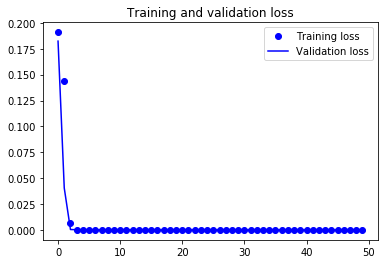

In [45]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [46]:
json_string = autoencoder.to_json()
autoencoder.save_weights('autoencoder.h5')
open('autoencoder.h5', 'w').write(json_string)

2578

In [47]:
encoder = Model(inputs = input_img, outputs = encoded)

In [48]:
train_x_encoded = encoder.predict(train_x)#----------------getting encoded training values
print(train_x_encoded.shape)
train_x_encoded = preprocessing.normalize(train_x_encoded)

test_x_encoded = encoder.predict(test_x)#----------------getting encoded training values
test_x_encoded = preprocessing.normalize(test_x_encoded)
print(test_x_encoded[258,1:32])





(58128, 128)
[0.08590426 0.         0.         0.12252581 0.         0.14586386
 0.07569894 0.13737315 0.         0.23495777 0.02952522 0.
 0.         0.         0.18587664 0.0418244  0.08425903 0.
 0.22492212 0.         0.         0.05320587 0.0382582  0.
 0.         0.24371035 0.         0.         0.00649695 0.
 0.        ]


In [49]:
autoencoder.get_weights()[0][1]

array([ 0.10457486, -0.08623362,  0.0461316 ,  0.01721803, -0.05462242,
       -0.00031961,  0.10820112, -0.0585335 , -0.08119556, -0.07836802,
        0.10309279,  0.07671379, -0.09158278, -0.10503457, -0.08257076,
       -0.06727601, -0.04061091, -0.03548842,  0.10810675,  0.103397  ,
       -0.09108108,  0.01954107,  0.03261907,  0.0847666 , -0.03633454,
        0.10611751,  0.03238071,  0.01178575,  0.00110723, -0.02155212,
       -0.05793218,  0.09908845,  0.02289898, -0.00398768,  0.0694057 ,
       -0.07048321,  0.04613401,  0.00314637,  0.10189278,  0.02150021,
       -0.09155091, -0.1050578 , -0.0495988 ,  0.1021763 ,  0.10185871,
       -0.08385991, -0.04692273,  0.04734032,  0.06153596, -0.02758286,
       -0.03914895, -0.04136934,  0.12647492,  0.07191866,  0.06332406,
       -0.03282573, -0.10774437, -0.01596531,  0.09860948, -0.06112369,
        0.02495899,  0.09321281,  0.06006483,  0.00583101,  0.00517134,
        0.0559228 ,  0.09187233,  0.08822265,  0.07632013, -0.01

In [50]:
#-------------------starting ELM

print(train_x.shape)
predicted_output=np.zeros([1,3])
print(predicted_output)
acc=0

(58128, 310)
[[0. 0. 0.]]


In [52]:
#---------------------------------STARTING EXTREME LEARNING MACHINE
start = time.time()
l=0
l_max=100 #-----------------------------------settting number of neurons
beta=0
error=0

weights = np.random.rand(128,500)*100#------------------------------creating random weight matrix== features X num_neuron #nearon should be greater than feature
weights_transpose = np.transpose(weights)
weights.shape
h_new = np.dot(train_x_encoded,weights)#--------------------------finding value of h
h_inv = np.linalg.pinv(h_new)#-----------------------------finding pseudo inverse of h
    
beta = np.dot(h_inv, train_label)#------------------finding beta
    #print(beta.shape)
    #print(h_new.shape)
predicted_output = np.dot(h_new,beta)#--------------------predicted output
        #error = y_train - predicted_output
        #print(predicted_output)
        
        
    #print(predicted_output.shape)

k=0
j=0
for k in range(58128):
    for j in range(3):
        max_item=max(predicted_output[k][:])#------------------------------changing the maximum value as 1 and other as 0
        if(predicted_output[k][j]==max_item):
            predicted_output[k][j]=1
    
        else:
            predicted_output[k][j]=0
        
   # print(predicted_output[i][:])    
   # print(predicted_output.shape)  
        #print(y_train)
acc = accuracy_score(predicted_output,train_label)#-----------------------------FInding accuracy
print("Accuracy ", "is", + acc*100, "%")      
end = time.time()
print("Time elapsed",end - start)
    #print(error)
    
    #print(h_inv.shape)
    #print(h_new.shape)
    #print(beta)
    #print(weights.shape)
#print(error[1][9])

Accuracy  is 74.50626204238921 %
Time elapsed 5.043430328369141


In [53]:
h_new_test = np.dot(test_x_encoded,weights)#--------------------------finding value of h

#for testing data
predicted_output_test = np.dot(h_new_test,beta)#--------------------predicted output

k=0
j=0
for k in range(58128):
    for j in range(3):
        max_item=max(predicted_output_test[k][:])#------------------------------changing the maximum value as 1 and other as 0
        if(predicted_output_test[k][j]==max_item):
            predicted_output_test[k][j]=1
    
        else:
            predicted_output_test[k][j]=0
        
   # print(predicted_output[i][:])    
   # print(predicted_output.shape)  
        #print(y_train)
acc = accuracy_score(predicted_output_test,test_labels)#-----------------------------FInding accuracy
print("Accuracy number", "is", + acc*100, "%") 

Accuracy number is 61.037709881640524 %
